In [1]:
import pandas as pd
import numpy as np
import datetime 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [3]:
retail=pd.read_excel('Online Retail.xlsx')

In [4]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [5]:
retail.shape

(541909, 8)

In [6]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
retail.dropna(subset=['CustomerID'],inplace=True)

In [9]:
retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
retail['InvoiceNo'].str.startswith('C',na=False).sum()

8905

In [11]:
check=retail['InvoiceNo'].str.startswith('C',na=False)

In [12]:
retail[check]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [13]:
canceled=retail[check]['InvoiceNo'].index

In [14]:
canceled

Int64Index([   141,    154,    235,    236,    237,    238,    239,    240,
               241,    939,
            ...
            540141, 540142, 540176, 540422, 540448, 540449, 541541, 541715,
            541716, 541717],
           dtype='int64', length=8905)

In [15]:
retail.drop(canceled,inplace=True)

In [16]:
(retail['InvoiceNo'].map(type)==str).sum()

0

In [17]:
retail.reset_index(inplace=True)
retail.drop(['index'],axis=1,inplace=True)

In [18]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [19]:
df=[retail["InvoiceDate"],retail["CustomerID"]]
headers=["Date","Customers"]
Rdf=pd.concat(df,axis=1,keys=headers)

In [20]:
Rdf

,Date,Customers
0,2010-12-01 08:26:00,17850.0
1,2010-12-01 08:26:00,17850.0
2,2010-12-01 08:26:00,17850.0
3,2010-12-01 08:26:00,17850.0
4,2010-12-01 08:26:00,17850.0
...,...,...
397919,2011-12-09 12:50:00,12680.0
397920,2011-12-09 12:50:00,12680.0
397921,2011-12-09 12:50:00,12680.0
397922,2011-12-09 12:50:00,12680.0


In [21]:
Rdf['Date'].is_monotonic_increasing

True

In [22]:
Rdf.shape

(397924, 2)

In [23]:
new1=pd.DataFrame({'Date':[pd.Timestamp('2010-12-01T00')],'Customers':[np.nan]})
new2=pd.DataFrame({'Date':[pd.Timestamp('2011-12-09T23')],'Customers':[np.nan]})
Rdf=pd.concat([new1,Rdf]).reset_index(drop=True)
Rdf=pd.concat([Rdf,new2]).reset_index(drop=True)
Rdf

,Date,Customers
0,2010-12-01 00:00:00,NaN
1,2010-12-01 08:26:00,17850.0
2,2010-12-01 08:26:00,17850.0
3,2010-12-01 08:26:00,17850.0
4,2010-12-01 08:26:00,17850.0
...,...,...
397921,2011-12-09 12:50:00,12680.0
397922,2011-12-09 12:50:00,12680.0
397923,2011-12-09 12:50:00,12680.0
397924,2011-12-09 12:50:00,12680.0


In [24]:
Rdf=Rdf.groupby(pd.Grouper(key='Date',freq='H')).agg({'Customers': pd.Series.nunique})


In [25]:
Rdf

,Customers
Date,
2010-12-01 00:00:00,0.0
2010-12-01 01:00:00,0.0
2010-12-01 02:00:00,0.0
2010-12-01 03:00:00,0.0
2010-12-01 04:00:00,0.0
...,...
2011-12-09 19:00:00,0.0
2011-12-09 20:00:00,0.0
2011-12-09 21:00:00,0.0


In [26]:
Rdf.reset_index(level=0,inplace=True)
Rdf

,Date,Customers
0,2010-12-01 00:00:00,0.0
1,2010-12-01 01:00:00,0.0
2,2010-12-01 02:00:00,0.0
3,2010-12-01 03:00:00,0.0
4,2010-12-01 04:00:00,0.0
...,...,...
8971,2011-12-09 19:00:00,0.0
8972,2011-12-09 20:00:00,0.0
8973,2011-12-09 21:00:00,0.0
8974,2011-12-09 22:00:00,0.0


In [27]:
Rdf['Date']

0      2010-12-01 00:00:00
1      2010-12-01 01:00:00
2      2010-12-01 02:00:00
3      2010-12-01 03:00:00
4      2010-12-01 04:00:00
               ...        
8971   2011-12-09 19:00:00
8972   2011-12-09 20:00:00
8973   2011-12-09 21:00:00
8974   2011-12-09 22:00:00
8975   2011-12-09 23:00:00
Name: Date, Length: 8976, dtype: datetime64[ns]

In [28]:
Rdf['Day'] = [d.date() for d in Rdf['Date']]
Rdf['Time'] = [d.time() for d in Rdf['Date']]

In [29]:
Rdf.drop(['Date'],axis=1,inplace=True)
Rdf=Rdf[['Day','Time','Customers']]

In [30]:
Rdf

,Day,Time,Customers
0,2010-12-01,00:00:00,0.0
1,2010-12-01,01:00:00,0.0
2,2010-12-01,02:00:00,0.0
3,2010-12-01,03:00:00,0.0
4,2010-12-01,04:00:00,0.0
...,...,...,...
8971,2011-12-09,19:00:00,0.0
8972,2011-12-09,20:00:00,0.0
8973,2011-12-09,21:00:00,0.0
8974,2011-12-09,22:00:00,0.0


In [31]:
Rdf=Rdf.pivot(index ='Day', columns ='Time',values='Customers')

In [32]:
Rdf

Time,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Day,,,,,,,,,,,,,,,,,,,,,,,,
2010-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,9.0,11.0,20.0,12.0,7.0,11.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,5.0,10.0,9.0,14.0,11.0,7.0,13.0,10.0,9.0,9.0,2.0,0.0,0.0,0.0,0.0
2010-12-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,4.0,9.0,6.0,9.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,17.0,16.0,7.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,9.0,9.0,18.0,16.0,16.0,11.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,9.0,17.0,25.0,10.0,14.0,8.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,8.0,12.0,20.0,12.0,9.0,11.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
Rdf.reset_index(level=0,inplace=True)

In [34]:
Rdf

Time,Day,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
0,2010-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,9.0,11.0,20.0,12.0,7.0,11.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-12-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,5.0,10.0,9.0,14.0,11.0,7.0,13.0,10.0,9.0,9.0,2.0,0.0,0.0,0.0,0.0
2,2010-12-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,4.0,9.0,6.0,9.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,17.0,16.0,7.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2011-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,9.0,9.0,18.0,16.0,16.0,11.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
370,2011-12-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,9.0,17.0,25.0,10.0,14.0,8.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
371,2011-12-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,8.0,12.0,20.0,12.0,9.0,11.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
372,2011-12-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,7.0,12.0,19.0,14.0,7.0,14.0,6.0,5.0,7.0,5.0,1.0,0.0,0.0,0.0


In [35]:
t=list(Rdf.columns)[1:]

In [36]:
Rdf.columns.name=None

In [37]:
days=Rdf[Rdf.duplicated(t,keep=False)]['Day']

In [38]:
days

3      2010-12-04
10     2010-12-11
17     2010-12-18
23     2010-12-24
24     2010-12-25
          ...    
339    2011-11-05
346    2011-11-12
353    2011-11-19
360    2011-11-26
367    2011-12-03
Name: Day, Length: 69, dtype: object

In [39]:
D=[datetime.datetime(d.year, d.month, d.day) for d in days]

In [40]:
days_week=list(pd.Series(D).dt.day_name())


In [41]:
set(days_week)

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

In [42]:
for x in set(days_week):
  print('Number of {}s that has missing data is {}'.format(x, days_week.count(x)))

Number of Saturdays that has missing data is 53
Number of Thursdays that has missing data is 1
Number of Tuesdays that has missing data is 1
Number of Mondays that has missing data is 6
Number of Wednesdays that has missing data is 1
Number of Sundays that has missing data is 3
Number of Fridays that has missing data is 4


In [43]:
all_days = pd.date_range('2010-12-01', '2011-12-09', freq='D').to_series()

In [44]:
all_days_week=list(all_days.dt.day_name())

In [45]:
for x in set(all_days_week):
  print('Number of {}s in the given timeframe is {}'.format(x, all_days_week.count(x)))

Number of Saturdays in the given timeframe is 53
Number of Thursdays in the given timeframe is 54
Number of Tuesdays in the given timeframe is 53
Number of Mondays in the given timeframe is 53
Number of Wednesdays in the given timeframe is 54
Number of Sundays in the given timeframe is 53
Number of Fridays in the given timeframe is 54


Therefore, in the given timeframe data is missing for all saturdays.

In [46]:
#Rdf.columns.name='Time'

In [47]:
Rdf.set_index('Day')

,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Day,,,,,,,,,,,,,,,,,,,,,,,,
2010-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,9.0,11.0,20.0,12.0,7.0,11.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,5.0,10.0,9.0,14.0,11.0,7.0,13.0,10.0,9.0,9.0,2.0,0.0,0.0,0.0,0.0
2010-12-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,4.0,9.0,6.0,9.0,6.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,13.0,17.0,16.0,7.0,14.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,9.0,9.0,18.0,16.0,16.0,11.0,15.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,9.0,17.0,25.0,10.0,14.0,8.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-12-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.0,8.0,12.0,20.0,12.0,9.0,11.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
Rdf.set_index('Day').values.sum()

17131.0

In [49]:
total=Rdf.set_index('Day').values.sum()

In [50]:
t_drop=t[:6]+t[20:]
t_drop

[datetime.time(0, 0),
 datetime.time(1, 0),
 datetime.time(2, 0),
 datetime.time(3, 0),
 datetime.time(4, 0),
 datetime.time(5, 0),
 datetime.time(20, 0),
 datetime.time(21, 0),
 datetime.time(22, 0),
 datetime.time(23, 0)]

In [51]:
Rdf.drop(t_drop,inplace=True,axis=1)
Rdf.set_index('Day',inplace=True)
Rdf

,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00
Day,,,,,,,,,,,,,,
2010-12-01,0.0,0.0,3.0,12.0,9.0,11.0,20.0,12.0,7.0,11.0,9.0,4.0,0.0,0.0
2010-12-02,0.0,2.0,3.0,5.0,10.0,9.0,14.0,11.0,7.0,13.0,10.0,9.0,9.0,2.0
2010-12-03,0.0,0.0,0.0,5.0,6.0,4.0,9.0,6.0,9.0,6.0,3.0,2.0,0.0,0.0
2010-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-12-05,0.0,0.0,0.0,0.0,8.0,13.0,17.0,16.0,7.0,14.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,0.0,0.0,3.0,5.0,9.0,9.0,18.0,16.0,16.0,11.0,15.0,6.0,0.0,0.0
2011-12-06,0.0,0.0,4.0,6.0,9.0,17.0,25.0,10.0,14.0,8.0,6.0,6.0,0.0,0.0
2011-12-07,0.0,0.0,7.0,7.0,8.0,12.0,20.0,12.0,9.0,11.0,5.0,4.0,0.0,0.0


In [52]:
Rdf.values.sum()

17114.0

In [53]:
pivoted_total=Rdf.values.sum()

In [54]:
print('proprtion of customers between 6 a.m. to 8 p.m. is {}%'.format(round(pivoted_total*100/total,2)))

proprtion of customers between 6 a.m. to 8 p.m. is 99.9%


In [55]:
RdfQ=Rdf.reset_index(level=0)

In [56]:
RdfQ

,Day,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00
0,2010-12-01,0.0,0.0,3.0,12.0,9.0,11.0,20.0,12.0,7.0,11.0,9.0,4.0,0.0,0.0
1,2010-12-02,0.0,2.0,3.0,5.0,10.0,9.0,14.0,11.0,7.0,13.0,10.0,9.0,9.0,2.0
2,2010-12-03,0.0,0.0,0.0,5.0,6.0,4.0,9.0,6.0,9.0,6.0,3.0,2.0,0.0,0.0
3,2010-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2010-12-05,0.0,0.0,0.0,0.0,8.0,13.0,17.0,16.0,7.0,14.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2011-12-05,0.0,0.0,3.0,5.0,9.0,9.0,18.0,16.0,16.0,11.0,15.0,6.0,0.0,0.0
370,2011-12-06,0.0,0.0,4.0,6.0,9.0,17.0,25.0,10.0,14.0,8.0,6.0,6.0,0.0,0.0
371,2011-12-07,0.0,0.0,7.0,7.0,8.0,12.0,20.0,12.0,9.0,11.0,5.0,4.0,0.0,0.0
372,2011-12-08,0.0,0.0,1.0,9.0,7.0,12.0,19.0,14.0,7.0,14.0,6.0,5.0,7.0,5.0


In [57]:
Days=RdfQ['Day']
Days_new=[datetime.datetime(d.year, d.month, d.day) for d in Days]

In [58]:
RdfQ['Quarter']= pd.Series(Days_new).dt.quarter

In [59]:
RdfQ

,Day,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,Quarter
0,2010-12-01,0.0,0.0,3.0,12.0,9.0,11.0,20.0,12.0,7.0,11.0,9.0,4.0,0.0,0.0,4
1,2010-12-02,0.0,2.0,3.0,5.0,10.0,9.0,14.0,11.0,7.0,13.0,10.0,9.0,9.0,2.0,4
2,2010-12-03,0.0,0.0,0.0,5.0,6.0,4.0,9.0,6.0,9.0,6.0,3.0,2.0,0.0,0.0,4
3,2010-12-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,2010-12-05,0.0,0.0,0.0,0.0,8.0,13.0,17.0,16.0,7.0,14.0,4.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2011-12-05,0.0,0.0,3.0,5.0,9.0,9.0,18.0,16.0,16.0,11.0,15.0,6.0,0.0,0.0,4
370,2011-12-06,0.0,0.0,4.0,6.0,9.0,17.0,25.0,10.0,14.0,8.0,6.0,6.0,0.0,0.0,4
371,2011-12-07,0.0,0.0,7.0,7.0,8.0,12.0,20.0,12.0,9.0,11.0,5.0,4.0,0.0,0.0,4
372,2011-12-08,0.0,0.0,1.0,9.0,7.0,12.0,19.0,14.0,7.0,14.0,6.0,5.0,7.0,5.0,4


In [60]:
RdfQ.sort_values(by=['Quarter','Day'],inplace=True)

In [61]:
RdfQ.drop(['Day'],inplace=True,axis=1)
RdfQ.set_index('Quarter',inplace=True)
RdfQ

,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00
Quarter,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,6.0,5.0,5.0,7.0,6.0,5.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,3.0,6.0,7.0,12.0,8.0,1.0,5.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.0,0.0,3.0,5.0,9.0,9.0,18.0,16.0,16.0,11.0,15.0,6.0,0.0,0.0
4,0.0,0.0,4.0,6.0,9.0,17.0,25.0,10.0,14.0,8.0,6.0,6.0,0.0,0.0
4,0.0,0.0,7.0,7.0,8.0,12.0,20.0,12.0,9.0,11.0,5.0,4.0,0.0,0.0


In [62]:
RdfQ.reset_index(level=0,inplace=True)
RdfQ

,Quarter,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,6.0,5.0,5.0,7.0,6.0,5.0,1.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,3.0,6.0,7.0,12.0,8.0,1.0,5.0,3.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,4,0.0,0.0,3.0,5.0,9.0,9.0,18.0,16.0,16.0,11.0,15.0,6.0,0.0,0.0
370,4,0.0,0.0,4.0,6.0,9.0,17.0,25.0,10.0,14.0,8.0,6.0,6.0,0.0,0.0
371,4,0.0,0.0,7.0,7.0,8.0,12.0,20.0,12.0,9.0,11.0,5.0,4.0,0.0,0.0
372,4,0.0,0.0,1.0,9.0,7.0,12.0,19.0,14.0,7.0,14.0,6.0,5.0,7.0,5.0


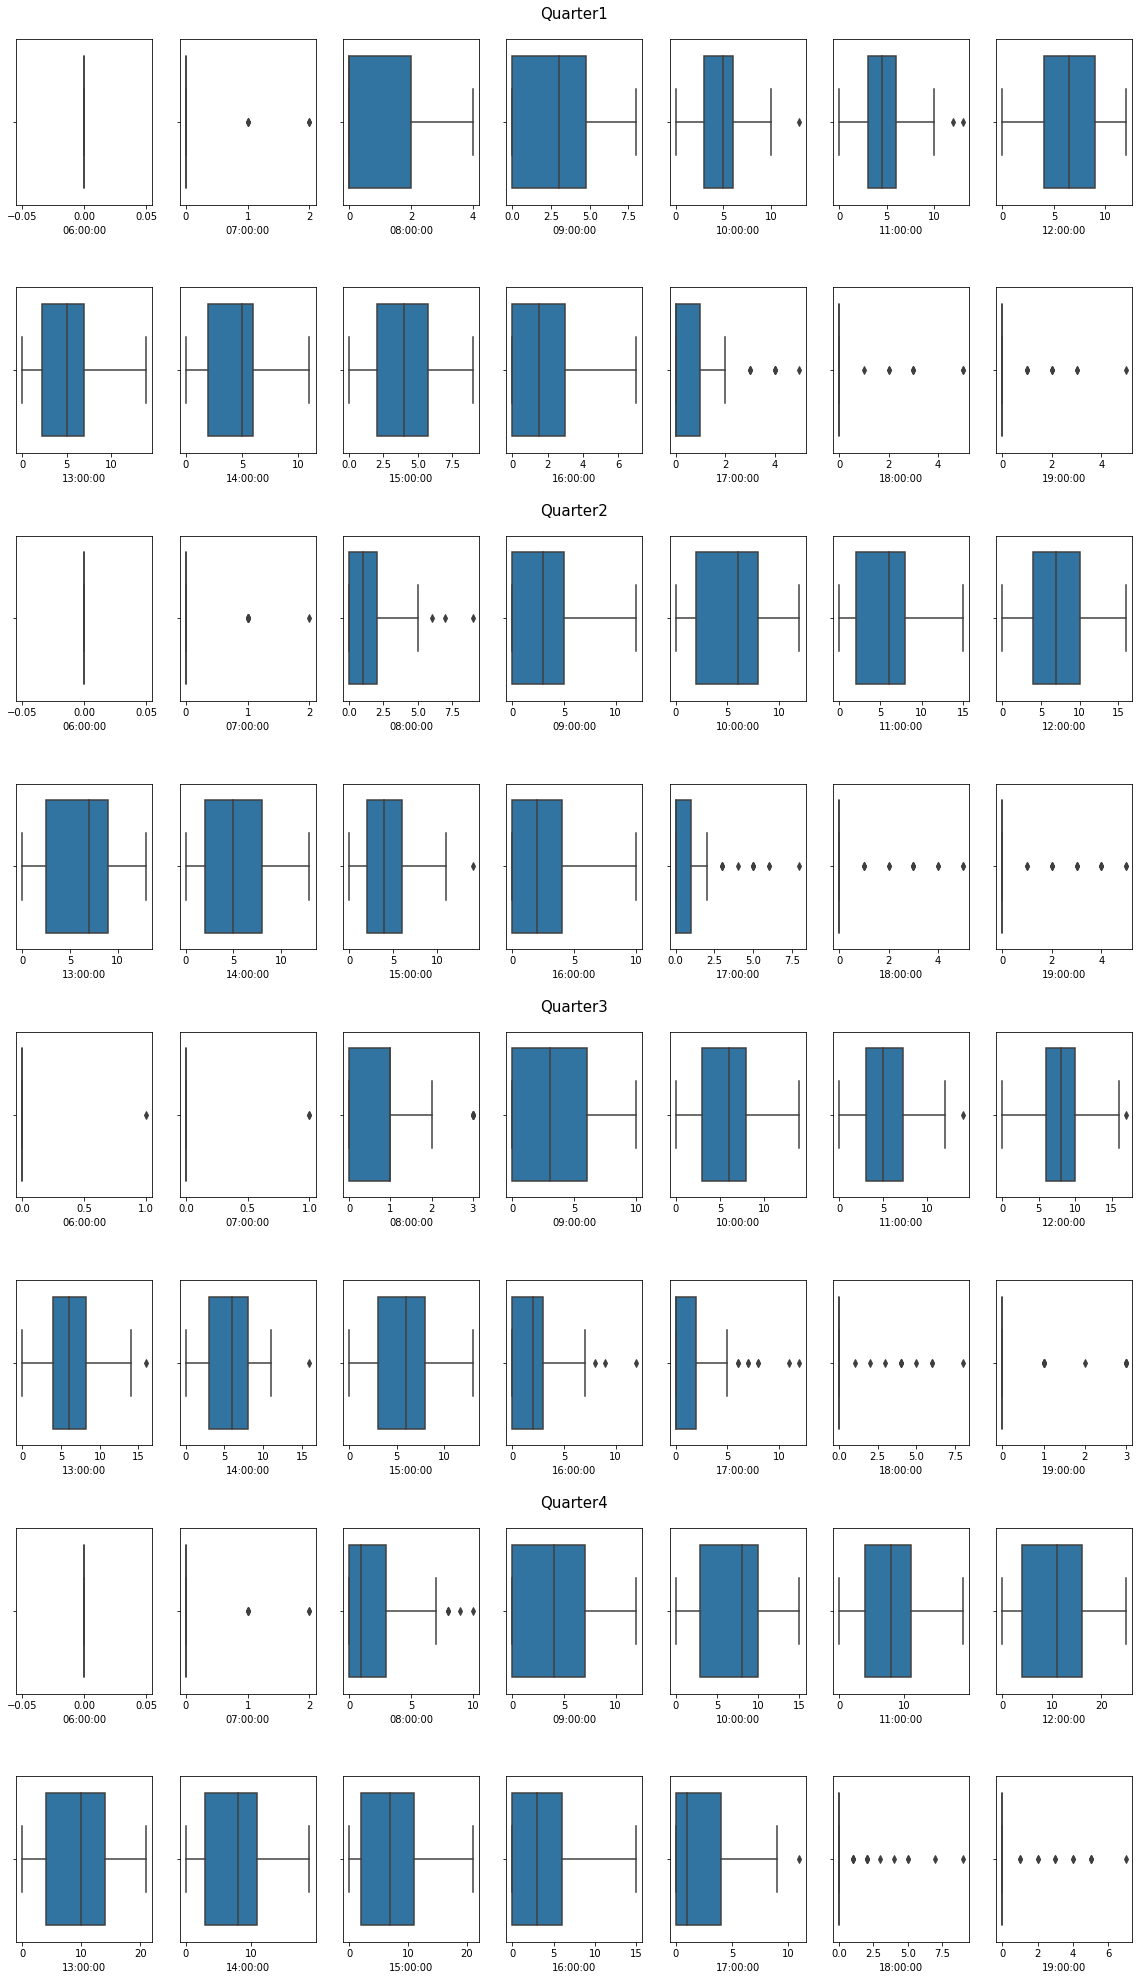

In [63]:
fig,axes=plt.subplots(8,7,figsize=(20,35))
plt.subplots_adjust(hspace=0.5)

axes[0,3].set_title("Quarter1",fontsize=15,pad=20)
j=0
for i in t[6:20]:
  if j<7:
    DATA=RdfQ.loc[RdfQ['Quarter']==1,[i]]
    sns.boxplot(x=i,data=DATA,ax=axes[0,j])
    j=j+1
  else:
    DATA=RdfQ.loc[RdfQ['Quarter']==1,[i]]
    sns.boxplot(x=i,data=DATA,ax=axes[1,j-7])
    j=j+1

axes[2,3].set_title("Quarter2",fontsize=15,pad=20)
j=0
for i in t[6:20]:
  if j<7:
    DATA=RdfQ.loc[RdfQ['Quarter']==2,[i]]
    sns.boxplot(x=i,data=DATA,ax=axes[2,j])
    j=j+1
  else:
    DATA=RdfQ.loc[RdfQ['Quarter']==2,[i]]
    sns.boxplot(x=i,data=DATA,ax=axes[3,j-7])
    j=j+1

axes[4,3].set_title("Quarter3",fontsize=15,pad=20)
j=0
for i in t[6:20]:
  if j<7:
    DATA=RdfQ.loc[RdfQ['Quarter']==3,[i]]
    sns.boxplot(x=i,data=DATA,ax=axes[4,j])
    j=j+1
  else:
    DATA=RdfQ.loc[RdfQ['Quarter']==3,[i]]
    sns.boxplot(x=i,data=DATA,ax=axes[5,j-7])
    j=j+1

axes[6,3].set_title("Quarter4",fontsize=15,pad=20)
j=0
for i in t[6:20]:
  if j<7:
    DATA=RdfQ.loc[RdfQ['Quarter']==4,[i]]
    sns.boxplot(x=i,data=DATA,ax=axes[6,j])
    j=j+1
  else:
    DATA=RdfQ.loc[RdfQ['Quarter']==4,[i]]
    sns.boxplot(x=i,data=DATA,ax=axes[7,j-7])
    j=j+1



In [64]:
for i in range(4):
  S=RdfQ.loc[RdfQ['Quarter']==i+1,t[6:20]].values
  print("Shape of array for quarter {} is {}".format(i+1,S.shape))

Shape of array for quarter 1 is (90, 14)
Shape of array for quarter 2 is (91, 14)
Shape of array for quarter 3 is (92, 14)
Shape of array for quarter 4 is (101, 14)


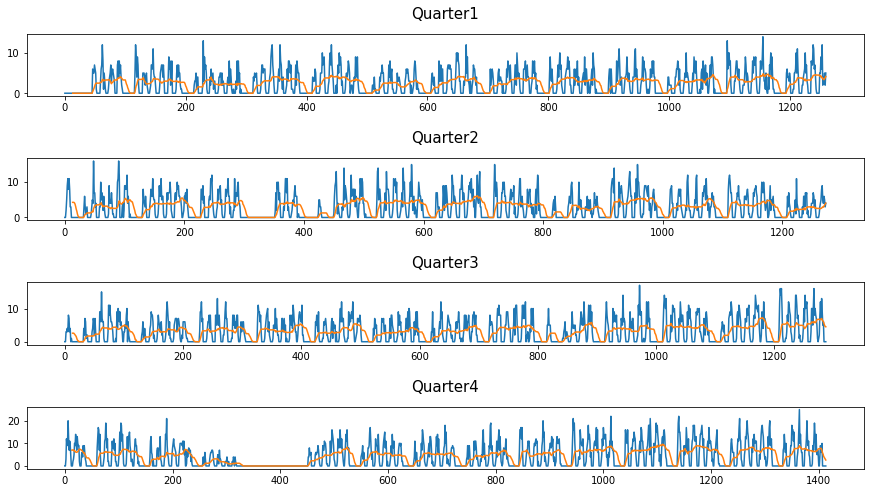

In [65]:
fig,axes=plt.subplots(4,1,figsize=(15,8))
plt.subplots_adjust(hspace=1)

Q1=RdfQ.loc[RdfQ['Quarter']==1,t[6:20]].values
Q1=np.reshape(Q1,90*14)
S1=pd.Series(Q1)
axes[0].set_title("Quarter1",fontsize=15,pad=15)
S1.plot(ax=axes[0])
S1.rolling(window=14).mean().plot(ax=axes[0])

Q2=RdfQ.loc[RdfQ['Quarter']==2,t[6:20]].values
Q2=np.reshape(Q2,91*14)
S2=pd.Series(Q2)
axes[1].set_title("Quarter2",fontsize=15,pad=15)
S2.plot(ax=axes[1])
S2.rolling(window=14).mean().plot(ax=axes[1])

Q3=RdfQ.loc[RdfQ['Quarter']==3,t[6:20]].values
Q3=np.reshape(Q3,92*14)
S3=pd.Series(Q3)
axes[2].set_title("Quarter3",fontsize=15,pad=15)
S3.plot(ax=axes[2])
S3.rolling(window=14).mean().plot(ax=axes[2])

Q4=RdfQ.loc[RdfQ['Quarter']==4,t[6:20]].values
Q4=np.reshape(Q4,101*14)
S4=pd.Series(Q4)
axes[3].set_title("Quarter4",fontsize=15,pad=15)
S4.plot(ax=axes[3])
S4.rolling(window=14).mean().plot(ax=axes[3])